### Michael Peres, 200362146, Assignment 1, ECS708P

## Report
-----


#### Question 5


<font color="maroon">What conclusion if any can be drawn from the weight values? How does gender and BMI affect blood sugar levels?

So after training our linear regression model towards a gradient of 0, we obtained a minimum cost function of 2894.

The relationship between y^ and y true, was pretty linear and so can assume the model had some accuracy in predicting values.

We can then take the model and view the weights, the larger the magnitude in the weight the important it is in the overall assumption.


Here are the weight labels, 

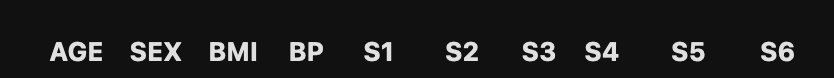

And these were the values:

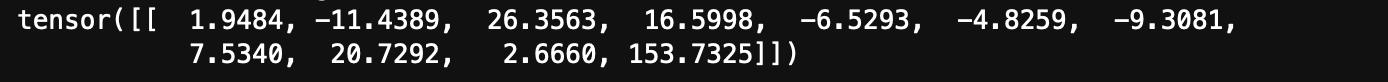



We can state that because SEX had a weight of 26 it is comparitively lower than say the effect S4 which has a weighting of 153.

For BMI, its weighting is 16.59, so both of these features affect the value of prediction increasingly, whereas features such as AGE has a negative effect.  

----

#### Question 6

<font color="maroon">Try the code with a number of learning rates that differ by orders of magnitude and record the error of the training and test sets. What do you observe on the training error? What about the error on the test set? [3 marks]</font>

In [72]:
### Question 6

def run_epochs(learning_rate, x, y):
    cost_lst = []
    for it in range(100):
        #print("x_train shape", x_train.shape)
        prediction = model(x)
        cost = mean_squared_error(y, prediction)
        #print("cost:", cost)
        cost_lst.append(cost)
        gradient_descent_step(model, x, y, prediction, alpha)
    return min(cost_lst)


# Testing x_train data on different learning rates, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001 
learning_rates = [10**-x for x in range(0, 10)]

_ = [print(f"100 Epochs | Min Cost: {run_epochs(lr, x_train, y_train)} | LR: {lr} | Training Data ") for lr in learning_rates]
print("-"*20)
_ = [print(f"100 Epochs | Min Cost: {run_epochs(lr, x_test, y_test)} | LR: {lr} | Test Data ") for lr in learning_rates]

100 Epochs | Min Cost: 2886.81689453125 | LR: 1 | Training Data 
100 Epochs | Min Cost: 2878.946533203125 | LR: 0.1 | Training Data 
100 Epochs | Min Cost: 2876.142333984375 | LR: 0.01 | Training Data 
100 Epochs | Min Cost: 2874.633056640625 | LR: 0.001 | Training Data 
100 Epochs | Min Cost: 2873.55810546875 | LR: 0.0001 | Training Data 
100 Epochs | Min Cost: 2872.70458984375 | LR: 1e-05 | Training Data 
100 Epochs | Min Cost: 2872.0029296875 | LR: 1e-06 | Training Data 
100 Epochs | Min Cost: 2871.42138671875 | LR: 1e-07 | Training Data 
100 Epochs | Min Cost: 2870.9384765625 | LR: 1e-08 | Training Data 
100 Epochs | Min Cost: 2870.536376953125 | LR: 1e-09 | Training Data 
--------------------
100 Epochs | Min Cost: 2587.477294921875 | LR: 1 | Test Data 
100 Epochs | Min Cost: 2580.051513671875 | LR: 0.1 | Test Data 
100 Epochs | Min Cost: 2577.6865234375 | LR: 0.01 | Test Data 
100 Epochs | Min Cost: 2576.5458984375 | LR: 0.001 | Test Data 
100 Epochs | Min Cost: 2575.7333984375 |

Based on results found, on the training and test data at different learning rates, we obtain different costs, however generally speaking with the epochs constant, we can view a better (lower) cost overall when using lower magnitudes of learning rate (alpha). Possible as we are not jumping around the minimum and actually reaching the closer to the minimum in smaller steps rather than jumping around.


Below are the examples which I used, these were obtained by running different ranges of learning rates.


Results confirming conclusion above:

<pre>
100 Epochs | Min Cost: 2886.81689453125 | LR: 1 | Training Data 
100 Epochs | Min Cost: 2878.946533203125 | LR: 0.1 | Training Data 
100 Epochs | Min Cost: 2876.142333984375 | LR: 0.01 | Training Data 
100 Epochs | Min Cost: 2874.633056640625 | LR: 0.001 | Training Data 
100 Epochs | Min Cost: 2873.55810546875 | LR: 0.0001 | Training Data 
100 Epochs | Min Cost: 2872.70458984375 | LR: 1e-05 | Training Data 
100 Epochs | Min Cost: 2872.0029296875 | LR: 1e-06 | Training Data 
100 Epochs | Min Cost: 2871.42138671875 | LR: 1e-07 | Training Data 
100 Epochs | Min Cost: 2870.9384765625 | LR: 1e-08 | Training Data 
100 Epochs | Min Cost: 2870.536376953125 | LR: 1e-09 | Training Data 
--------------------
100 Epochs | Min Cost: 2587.477294921875 | LR: 1 | Test Data 
100 Epochs | Min Cost: 2580.051513671875 | LR: 0.1 | Test Data 
100 Epochs | Min Cost: 2577.6865234375 | LR: 0.01 | Test Data 
100 Epochs | Min Cost: 2576.5458984375 | LR: 0.001 | Test Data 
100 Epochs | Min Cost: 2575.7333984375 | LR: 0.0001 | Test Data 
100 Epochs | Min Cost: 2575.03662109375 | LR: 1e-05 | Test Data 
100 Epochs | Min Cost: 2574.40283203125 | LR: 1e-06 | Test Data 
100 Epochs | Min Cost: 2573.81787109375 | LR: 1e-07 | Test Data 
100 Epochs | Min Cost: 2573.27490234375 | LR: 1e-08 | Test Data 
100 Epochs | Min Cost: 2572.77099609375 | LR: 1e-09 | Test Data 
</pre>


------

#### Question 8


<font color="maroon"> First of all, find the best value of alpha to use in order to optimize best.
Next, experiment with different values of $\lambda$ and see how this affects the shape of the hypothesis. [3 marks]</font>

In [ ]:
# Question 8 

def non_linear_test(learning_rate=1, lam=weight_decay):
    cost_lst = list()
    model = LinearRegression(x3.shape[1])
    alpha = learning_rate # select an appropriate alpha
    lam = weight_decay # select an appropriate lambda
    # print(x3.shape, "x3 shape")
    for it in range(100):
        prediction = model(x3)
        cost = mean_squared_error(y, prediction, lam, model.weight)
        if not cost:
            print(cost, "cost is none")
        cost_lst.append(cost)
        gradient_descent_step(model, x3, y, prediction, alpha, lam)
    #display.clear_output(wait=True)
    #plt.plot(list(range(it+1)), cost_lst)
    #plt.show()
    # print(model.weight)
    print('Minimum cost: {}'.format(min(cost_lst)))
    
    print(f"Testing model with LR {learning_rate} and weight decay: {weight_decay}") 
    plt.scatter(x[:], y, c='red', marker='x', label='groundtruth')
    outputs = model(x3)
    print(outputs)
    plt.plot(x[:], outputs, c='blue', marker='o', label='prediction')
    plt.xlabel('x1')
    plt.ylabel('y=f(x1)')
    plt.legend()
    plt.show()
    return min(cost_lst)


    
    

print("Testing Linear Test")
best_error = torch.inf
best_pair = None

for i in range(0, 15):   # learning rate range.
    lr = 10**-i
    for j in range(0,15):
        weight_decay = 10**-j
        cost = non_linear_test(lr, weight_decay)
        if cost < best_error:
            best_error = cost
            best_pair = (lr, weight_decay)

print(f"Best pair found, lr: {best_pair[0]}, weight-decay : {best_pair[1]}")


For Question 8, we iterated through both learning rate ranges (alpha) and weight decay (lambda).

With this we can determine the best pair (based on minimum cost), 
which was: lr: 1, weight-decay : 1e-08.


Observations we can make:


1) The lower the learning rate, at constant 100 epochs, the more effect the weight decay has on the models performance.

2) Higher weight decay are effective when the learning rate is extremely low.



All 225 combination of lr and weight decay are within the juypter notebook, and can be viewed.




------
Side Notes for self:

I just realised, you can use Linear Regression for mathematically creating a mapping from x to y, but it also can be used to determine what relations exists between the different features (x)  and the overall cost (y) of the model. 

So if you run the hyperparameters as well as other performance related features of the model as the input, and output (y) as the model cost, we can learn what hyperparameters we should be tweaking based on the weightings given for specific weights in order to get the best model, in essence training the optimiser without needing to tweak hyperparameters ourselves. 


If this doesn't exist thats my research project for MSc.


--------

#### End of Assignment 1 (23/10/23)